# CS-2376 Apriori Algorithm
### Team Members
1. Jenish Raj Bajracharya
2. Nidup Dorji
3. Satpreet Makhija


In [1]:
import pandas as pd
import numpy as np
import operator
from itertools import combinations
import csv
from matplotlib import pyplot as plt
import sys

In [2]:
min_support = int(input("Enter support "))
min_confidence = float(input("Enter confidence level "))


data = set()
dataframe = []
transactions = 0
total_item = 0
with open('dataset/tesco2.csv', 'r') as file:
    reader = csv.reader(file)
    for row in reader:
        dataframe.append(row)
        transactions += 1
        for item in row:
            data.add(item)
            total_item += 1


## This cell reads file, and stores unique values from the transaction into data


     

In [86]:

global all_frequent_item
## This section makes a list of frequent-1 itemsets which are greater than the minimum support the user enters
def get_frequent_1_set(min_support, dataframe, data):
    temp_data = dict()
    itemset = data
    for i in itemset:
        count = 0
        for d in dataframe:
            if i in d:
                count += 1
        temp_data[i] = count
        if temp_data[i] < min_support:
            temp_data.pop(i)
    # return list(temp_data.keys())
    return sorted(temp_data.keys(), key=operator.itemgetter(0))


# def get_item_combination():
F1 = get_frequent_1_set(min_support, dataframe, data) 
# print(F1)

## returns the combinations of a specific size
def generate_candidate(array, size): # L1 is a list from get_freauent_set
    return sum([list(map(set, combinations(array, size)))], [])
  
# print(generate_candidate(F1,4))


## using the apriori property generates candidate set of size k (ck) using frequent k-1(Fk_1) itmeset
# Lk_1 = [['apple', 'beer'], ['apple', 'rice'], ['beer', 'chicken'], ['beer', 'milk'], ['beer', 'rice'], ['chicken', 'rice'], ['milk', 'rice']]
def apriori(Fk_1, k):
    ck = [] 
    for i in Fk_1:
       
        for j in Fk_1:
           
            index = 0
            buffer = []
            if i == j:
                pass
            else:
                while k-1 > index:
                    if i[index] == j[index]:
                        index += 1
                    else:
                        break
                else:
                    if i[k-1] > j[k-1]:
                        
                        for item in i:
                            buffer.append(item)
                        buffer.append(j[k-1])
                        check = generate_candidate(buffer, k)
                        count = 0
                        for c in check:
                            sorting = sorted(c)
                            if list(sorting) in Fk_1:
                                count += 1
                        if count == len(check):
                            ck.append(sorted(buffer))
                           
    return ck
                        


## returns frequent (Fk) itemset for all k using the apriori module defined previously.
all_frequent_item = dict()
def get_frequent_set(min_support, dataframe):
    F1 = get_frequent_1_set(min_support, dataframe, data)
    Fk_1 = []
    for item in F1:
        buffer = []
        buffer.append(item)
        Fk_1.append(buffer)
    print("                                              Frequent 1 Itemset")
    print(*Fk_1)
    print("\n")

    
    k = 1
    while len(Fk_1) != 0:
     
        ck = apriori(Fk_1, k)
        Fk = []

        for c in ck:
            count = 0
            candidate = set(c)
            for d in dataframe:
                if candidate.issubset(d):
                    count += 1
            if count >= min_support:
                sorting = sorted(candidate)
                Fk.append(sorting)
                all_frequent_item[tuple(c)] = count
        if Fk == []:
            print("                                              Frequent {} Itemset".format(k+1))
            print("None")
            print("\n")
        else:
            print("                                              Frequent {} Itemset".format(k+1))
            print(*Fk)
            print("\n")
        Fk_1 = []
        k += 1
      
        for item in Fk:
            Fk_1.append(item)
        
    return(all_frequent_item)


## generates all association rule form frquent_item (i.e list with all the frequnt item includes everything from size 0 to k )
support_list = []
confidence_list = []

def get_association_rule():
    frequent_item = get_frequent_set(min_support, dataframe)
    count = 0
    rule_count = 0
    print("                                                 Data Summary")

    print("Min Support = {} \nConfidence = {:.2f} % \nTransactions = {} \nItems = {}\n".format(min_support, min_confidence, transactions, total_item))
    print("                                              Association Rules")
    for item in frequent_item:
        count = 1
        # print("item : {}".format(item))
        sup_b = frequent_item[item]
        # print(item)
        while count < len(item):
            combo = generate_candidate(item,count)  # give us the possible combinations for item
            # print("combo : {}".format(combo))
            count = count + 1
            for c in combo:
                a = []
                sup_a = 0
               
                
                for i in c:
                    a.append(i)
                for data in dataframe:
                        if set(a).issubset(data):
                            sup_a = sup_a + 1 
                
                confidence = 100*sup_b/sup_a
                b = []

                if confidence >= min_confidence:
                    for sub_item in item: 
                        # print("a: {}".format(a))
                        # print("subitem: {}".format(sub_item))
                        if sub_item not in a:
                            b.append(sub_item)
                        # print("b : {}".format(b))
                    support_list.append(sup_b)
                    confidence_list.append(confidence)
                    rule_count = rule_count + 1
                   
                    print("================== Rule {} =============================".format(rule_count))
                    print ("{} ==> {}".format(a,b))
                    print("Support = {}".format(sup_b))
                    print("Condidence = {:0.2f} %".format(confidence))
                    print("\n")
    



rule
                                              Frequent 1 Itemset
['Butter'] ['Coffee Powder'] ['Cheese'] ['Ghee'] ['Milk'] ['Panner'] ['Sugar'] ['Sweet'] ['Tea Powder'] ['apple'] ['beer'] ['milk'] ['rice']


                                              Frequent 2 Itemset
['Butter', 'Cheese'] ['Ghee', 'Panner'] ['Sugar', 'Sweet'] ['Butter', 'Tea Powder'] ['Cheese', 'Tea Powder'] ['Panner', 'Tea Powder'] ['apple', 'beer'] ['beer', 'milk'] ['beer', 'rice']


                                              Frequent 3 Itemset
['Butter', 'Cheese', 'Tea Powder']


                                              Frequent 4 Itemset
None


1
                                              Frequent 1 Itemset
['Butter'] ['Coffee Powder'] ['Cheese'] ['Ghee'] ['Milk'] ['Panner'] ['Sugar'] ['Sweet'] ['Tea Powder'] ['apple'] ['beer'] ['milk'] ['rice']


                                              Frequent 2 Itemset
['Butter', 'Cheese'] ['Ghee', 'Panner'] ['Sugar', 'Sweet'] ['Butter', 'Tea Powder'] [

1

## Data Visualization
1. Support and Confidence scatter plot
2. Bar chart for frequent item sets

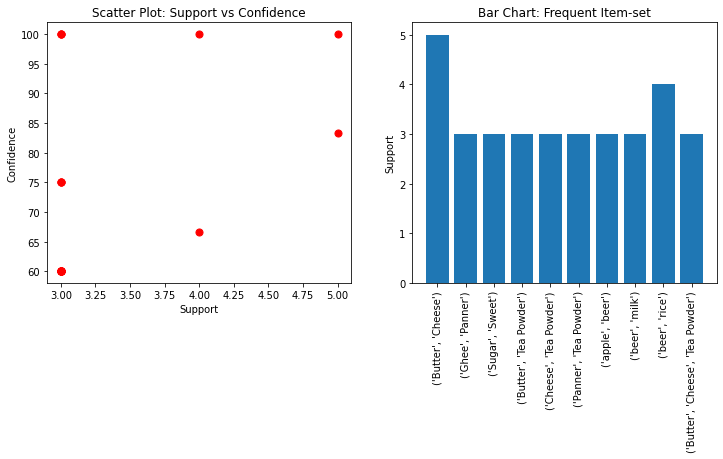

In [79]:
fig = plt.figure(figsize=(12,4.8))

plt.subplot(1, 2, 1)
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Scatter Plot: Support vs Confidence')
plt.scatter(support_list,confidence_list, color = 'red', s = 50)


plt.subplot(1, 2, 2)
frequent_item = all_frequent_item
plt.bar(range(len(frequent_item)), list(frequent_item.values()), align='center')
plt.xticks(range(len(frequent_item)), list(frequent_item.keys()), rotation = 90)
plt.ylabel('Support')
plt.title('Bar Chart: Frequent Item-set')


plt.show()

## Exporting output to a txt file

In [6]:
%%capture cap_out --no-stderr
get_association_rule()
var = cap_out.stdout



In [8]:
>>> var
file = open('output.txt', 'w')
file.write(var)

3254